Below is an organized, intuitive explanation and Python code for applying classification algorithms to the Diabetes dataset. Each step includes preprocessing, model training, evaluation, and plotting results.

### Intuitive Explanation
1. **Import Libraries**: We'll import necessary libraries like `pandas`, `numpy`, `sklearn`, and `matplotlib` to handle data, preprocessing, and algorithms.
2. **Load Data**: We'll load the dataset into a `DataFrame` and explore its structure.
3. **Preprocessing**:
   - Handle missing or zero values.
   - Scale features for better performance of algorithms sensitive to feature magnitude.
   - Split data into training and testing sets.
4. **Build Models**: Implement classification algorithms, including Logistic Regression, Decision Trees, Random Forests, SVM, K-Nearest Neighbors, Gradient Boosting, and Naive Bayes.
5. **Evaluate Models**:
   - Use metrics like accuracy, precision, recall, and F1-score.
   - Compare results across all algorithms.
6. **Visualization**: Plot model performance for easy comparison.

### Key Outputs
1. **Accuracy Scores**: For all algorithms, with metrics like precision and recall.
2. **Confusion Matrix**: Detailed error visualization.
3. **Bar Plot**: Comparison of algorithm performance.

### How This Helps in the Workshop
1. **Step-by-step flow**: Participants learn how to preprocess, train, and evaluate models systematically.
2. **Algorithm comparison**: See which algorithm performs best and why.
3. **Interactive learning**: Modify parameters or add datasets for extended experiments.

In [13]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Step 2: Load Data
url = "https://github.com/YBIFoundation/Dataset/raw/main/Diabetes.csv"
data = pd.read_csv(url)

# Preview data
print("Data Head:\n", data.head())
print("Data Info:\n", data.info())
print("Missing Values:\n", data.isnull().sum())

Data Head:
    pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          7

In [15]:
data.to_csv("diabetes.csv", index=False)

In [16]:
# Step 3: Preprocessing
# Replace zero values in columns where zero is invalid
cols_with_zero = ['glucose', 'diastolic', 'triceps', 'insulin', 'bmi']
for col in cols_with_zero:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].mean())  # Fill with mean values

# Feature-target split
X = data.drop('diabetes', axis=1)
y = data['diabetes']

# Standardizing features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [17]:
# Step 4: Build Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Store model performance
accuracy_scores = {}

# Training and evaluating models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"\nModel: {model_name}")
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Model: Logistic Regression
Accuracy: 0.7402597402597403
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231

Confusion Matrix:
 [[124  27]
 [ 33  47]]

Model: Decision Tree
Accuracy: 0.6883116883116883
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.73      0.75       151
           1       0.54      0.61      0.58        80

    accuracy                           0.69       231
   macro avg       0.66      0.67      0.66       231
weighted avg       0.70      0.69      0.69       231

Confusion Matrix:
 [[110  41]
 [ 31  49]]

Model: Random Forest
Accuracy: 0.7489177489177489
Classification Report:
               precision    reca

In [18]:
# Data for visualizations
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())

# Collecting metrics for comparison
metrics = {
    "Model": [],
    "Metric": [],
    "Score": []
}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    for metric in ["precision", "recall", "f1-score"]:
        metrics["Model"].append(model_name)
        metrics["Metric"].append(metric)
        metrics["Score"].append(report["weighted avg"][metric])

metrics_df = pd.DataFrame(metrics)

C:\Users\HP\AppData\Local\Temp\ipykernel_33716\2231996248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


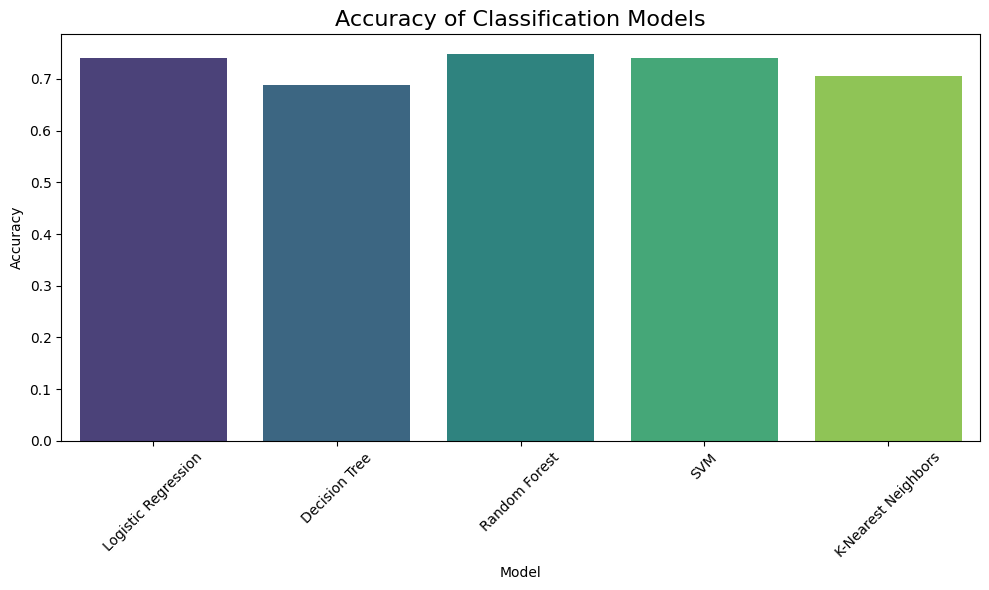

In [19]:
# 1. Bar Plot of Model Accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Accuracy of Classification Models", fontsize=16)
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

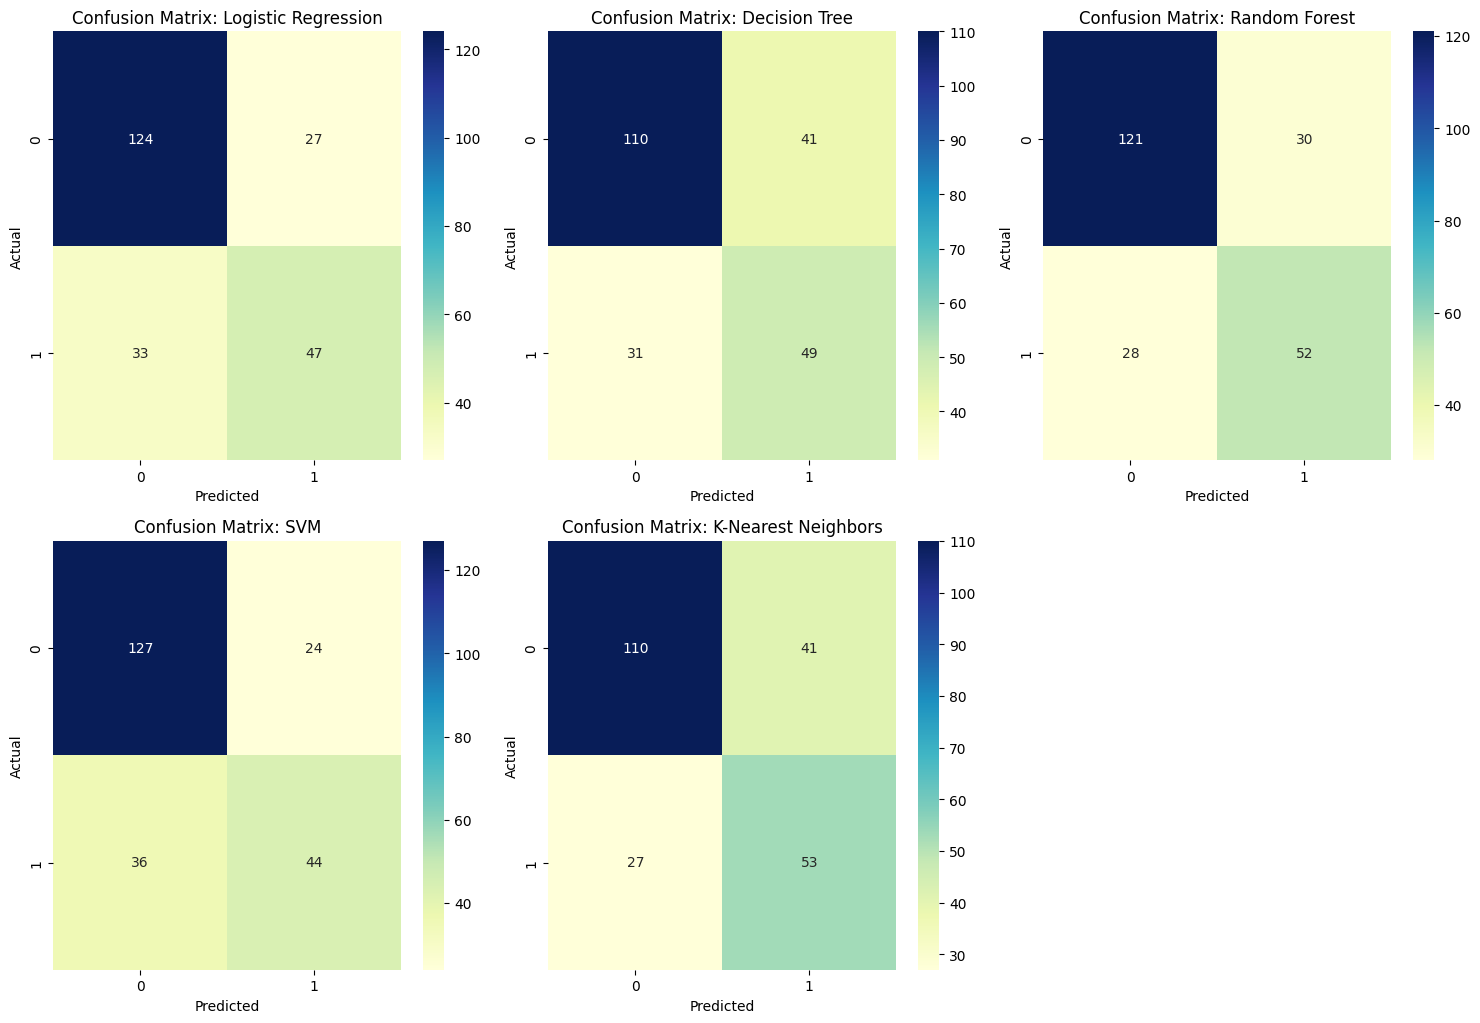

In [20]:
# 2. Confusion Matrix Heatmaps
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix: {model_name}", fontsize=12)
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

# Remove extra subplots
for j in range(len(models), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

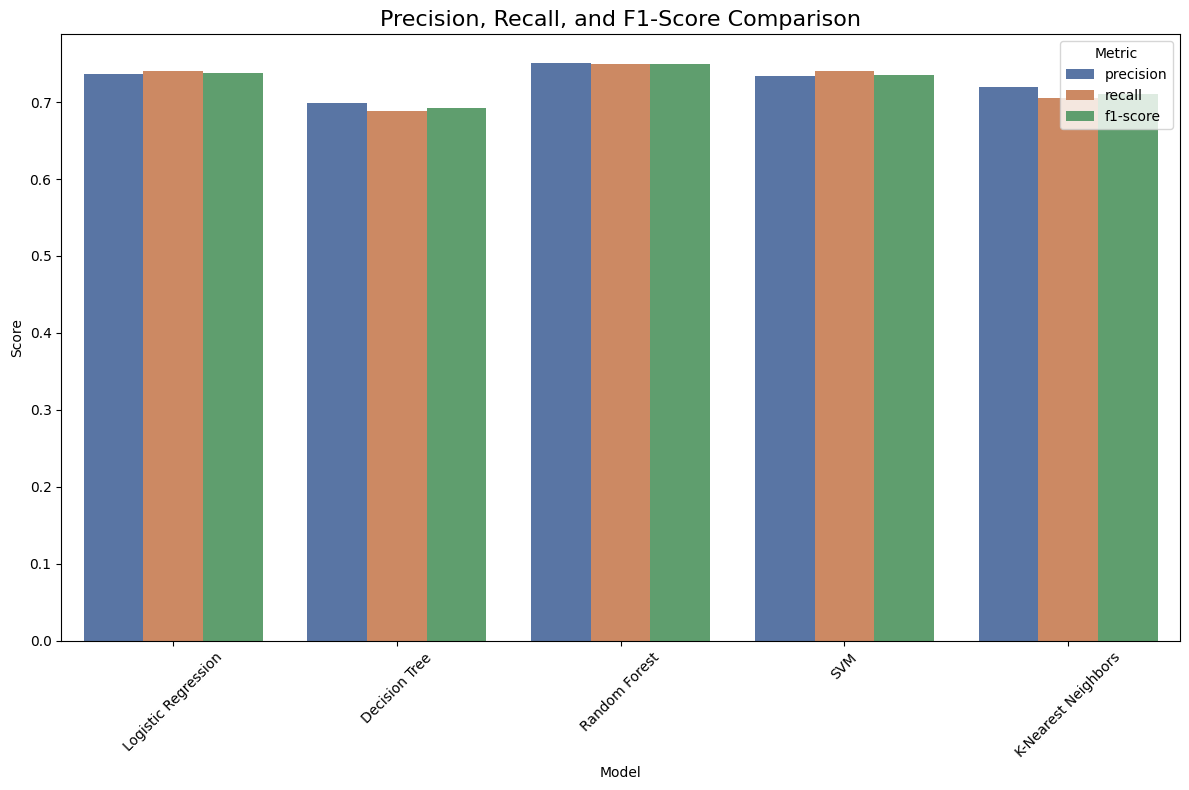

In [21]:
# 3. Precision, Recall, and F1-Score Comparison
plt.figure(figsize=(12, 8))
sns.barplot(data=metrics_df, x="Model", y="Score", hue="Metric", palette="deep")
plt.title("Precision, Recall, and F1-Score Comparison", fontsize=16)
plt.ylabel("Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()